In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Jupyter Notebook will ignore all the warnings
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [2]:
terror_data=pd.read_csv('globalterrorismdb_0718dist.csv',  encoding="ISO-8859-1")

In [3]:
terror_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
terror_data.shape

(181691, 135)

In [5]:
terror_data.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [6]:
columns = terror_data.columns.tolist()
print(columns)

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

### Renaming the Coloumns

In [7]:
df = pd.DataFrame(terror_data, terror_data.rename(columns={ 'success': 'Success', 'location': 'Location', 'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'Country',
                   'country': 'Country_code', 'provstate':'State','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                   'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                   'weaptype1_txt':'Weapon_type','motive':'Motive','city':'City','latitude':'Latitude','longitude':'Longitude'},inplace=True))

In [8]:
df.head()

,eventid,Year,Month,Day,approxdate,Extended,resolution,Country_code,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Feature Creation

In [9]:
df['Total_casualities']=df['Killed']+df['Wounded']

In [10]:
df.tail()

,eventid,Year,Month,Day,approxdate,Extended,resolution,Country_code,Country,region,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,Total_casualities
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN,3.0
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN,9.0
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN,0.0
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN,0.0
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN,0.0


In [11]:
df['Total_casualities'].max()

9574.0

In [12]:
df =  df[['Year','Month','Extended','Day','Country','State','Region','City','Latitude','Longitude','Location','AttackType','Killed','Wounded','Total_casualities','Target','Summary','Group','Target_type','Weapon_type','Motive', 'Success']]

In [13]:
df.head()

,Year,Month,Extended,Day,Country,State,Region,City,Latitude,Longitude,...,Killed,Wounded,Total_casualities,Target,Summary,Group,Target_type,Weapon_type,Motive,Success
0,1970,7,0,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,...,1.0,0.0,1.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,...,0.0,0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,1
2,1970,1,0,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,...,1.0,0.0,1.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1
3,1970,1,0,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,...,NaN,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,1
4,1970,1,0,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,...,NaN,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,1


In [14]:
df.shape

(181691, 22)

In [15]:
cols=df.columns.tolist()

In [16]:
print(cols)

['Year', 'Month', 'Extended', 'Day', 'Country', 'State', 'Region', 'City', 'Latitude', 'Longitude', 'Location', 'AttackType', 'Killed', 'Wounded', 'Total_casualities', 'Target', 'Summary', 'Group', 'Target_type', 'Weapon_type', 'Motive', 'Success']


### Data Preprocessing

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               181691 non-null  int64  
 1   Month              181691 non-null  int64  
 2   Extended           181691 non-null  int64  
 3   Day                181691 non-null  int64  
 4   Country            181691 non-null  object 
 5   State              181270 non-null  object 
 6   Region             181691 non-null  object 
 7   City               181257 non-null  object 
 8   Latitude           177135 non-null  float64
 9   Longitude          177134 non-null  float64
 10  Location           55495 non-null   object 
 11  AttackType         181691 non-null  object 
 12  Killed             171378 non-null  float64
 13  Wounded            165380 non-null  float64
 14  Total_casualities  164817 non-null  float64
 15  Target             181055 non-null  object 
 16  Su

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,181691.0,2002.638997,13.259430,1.970000e+03,1991.000000,2009.000000,2014.000000,2017.000000
Month,181691.0,6.467277,3.388303,0.000000e+00,4.000000,6.000000,9.000000,12.000000
Extended,181691.0,0.045346,0.208063,0.000000e+00,0.000000,0.000000,0.000000,1.000000
Day,181691.0,15.505644,8.814045,0.000000e+00,8.000000,15.000000,23.000000,31.000000
Latitude,177135.0,23.498343,18.569242,-5.315461e+01,11.510046,31.467463,34.685087,74.633553
Longitude,177134.0,-458.695653,204778.988611,-8.618590e+07,4.545640,43.246506,68.710327,179.366667
Killed,171378.0,2.403272,11.545741,0.000000e+00,0.000000,0.000000,2.000000,1570.000000
Wounded,165380.0,3.167668,35.949392,0.000000e+00,0.000000,0.000000,2.000000,8191.000000
Total_casualities,164817.0,5.296128,42.069023,0.000000e+00,0.000000,1.000000,4.000000,9574.000000
Success,181691.0,0.889598,0.313391,0.000000e+00,1.000000,1.000000,1.000000,1.000000


### Exploratory Data Analysis and Data Visualization

In [19]:
corr=df.corr()

### Heatmap Correlation

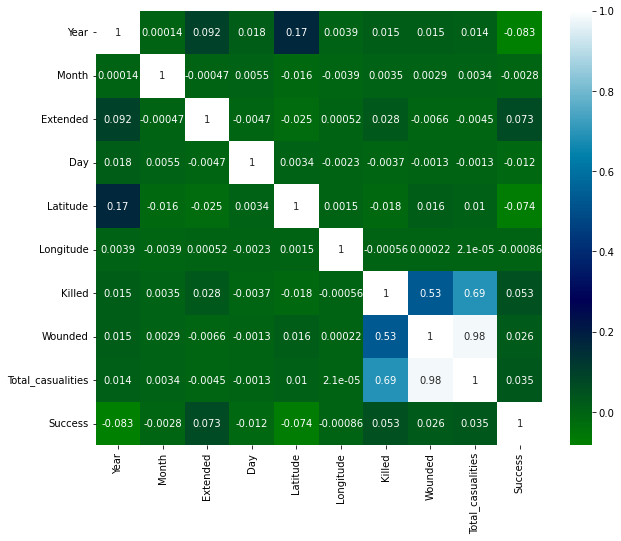

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='ocean')
plt.show()

### Numbper of Terrorist Activities per year

In [21]:
df['Year'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017], dtype=int64)

In [26]:
count=df['Year'].value_counts()

In [33]:
year=count.index.sort_values(ascending=True)
val=[]

In [37]:
for i in year:
    val.append(count[i])

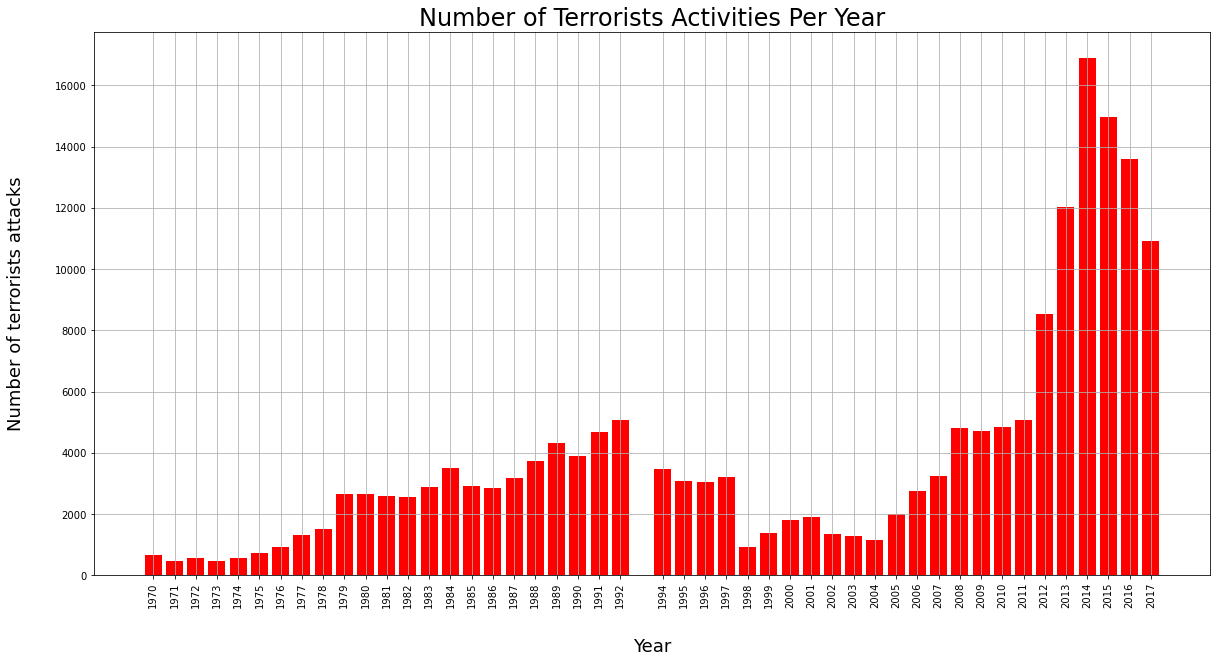

In [48]:
plt.figure(figsize = (20,10))
plt.bar(year, val, tick_label=year, color='red')
plt.xticks(rotation=90)
plt.title('Number of Terrorists Activities Per Year', fontsize=24)
plt.xlabel('Year', fontsize = 18, labelpad = 30)
plt.ylabel('Number of terrorists attacks', fontsize = 18, labelpad = 30)
plt.grid(True)
plt.show()

### Total Casualties Per Year

In [60]:
Cas_Year  = df.groupby(by = df['Year']).Total_casualities.sum().to_frame().reset_index()

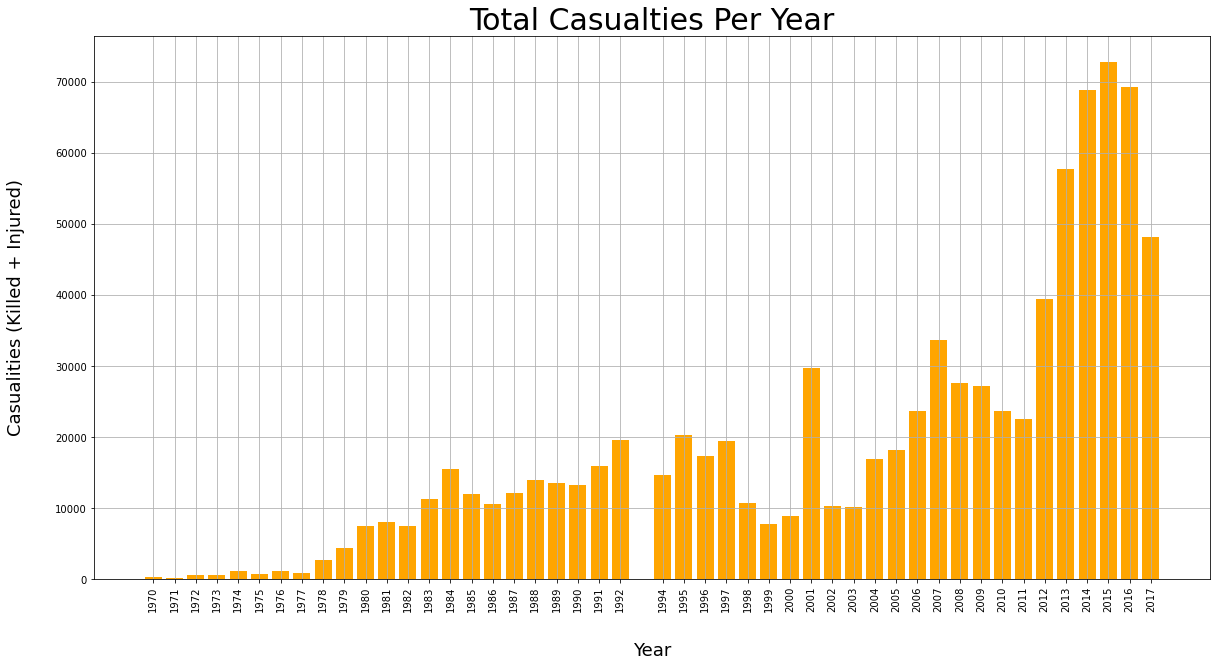

In [61]:
plt.figure(figsize = (20,10))
plt.bar(Cas_Year['Year'], Cas_Year['Total_casualities'], tick_label = Cas_Year['Year'], color =  'orange')
plt.xticks(rotation  = 90)
plt.title('Total Casualties Per Year', fontsize=30)  
plt.grid(True)
plt.xlabel('Year', fontsize = 18, labelpad = 30)
plt.ylabel('Casualities (Killed + Injured)', fontsize = 18, labelpad = 30)
plt.show()

### Countries affected by Terrorist Attacks

In [70]:
countries=df['Country'].value_counts().index.tolist()
print("Number of Countries affected by Terrorist Attacks :", len(countries))

Number of Countries affected by Terrorist Attacks : 205


### Top 30 Countries affected by Terrorist Attacks

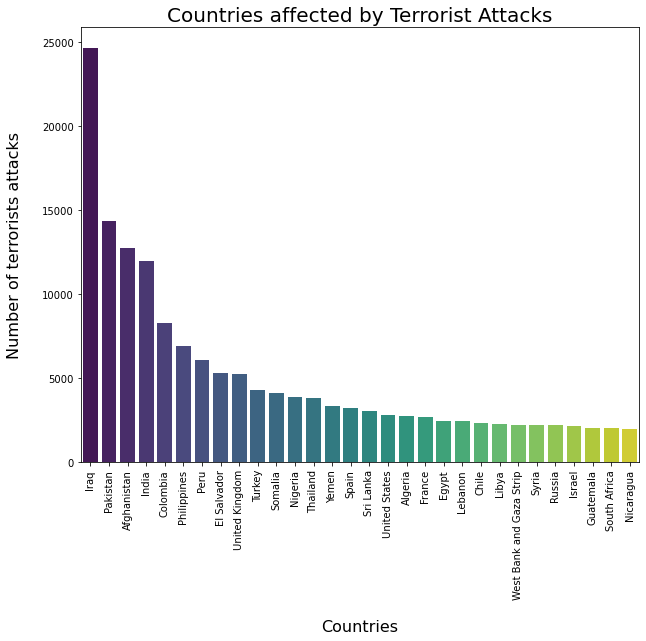

In [82]:
fig = plt.figure(figsize=(10,8))
sns.barplot(df['Country'].value_counts()[0:30].index, df['Country'].value_counts()[0:30].values, palette='viridis', tick_label=countries[0:30])
plt.xticks(rotation=90)
plt.title('Countries affected by Terrorist Attacks', fontsize =  20)
plt.xlabel('Countries', fontsize = 16, labelpad = 20)
plt.ylabel('Number of terrorists attacks', fontsize = 16, labelpad = 20)
plt.show()

### Number of Total Casualities in Each Country

In [93]:
count_caus=df.groupby('Country')['Total_casualities'].sum().to_frame().reset_index().sort_values('Total_casualities', ascending=False)
count_caus.head(20)

,Country,Total_casualities
84,Iraq,202982.0
0,Afghanistan,80213.0
134,Pakistan,64427.0
80,India,47108.0
167,Sri Lanka,29792.0
189,United States,24469.0
35,Colombia,23767.0
140,Philippines,22361.0
130,Nigeria,21728.0
175,Syria,21614.0


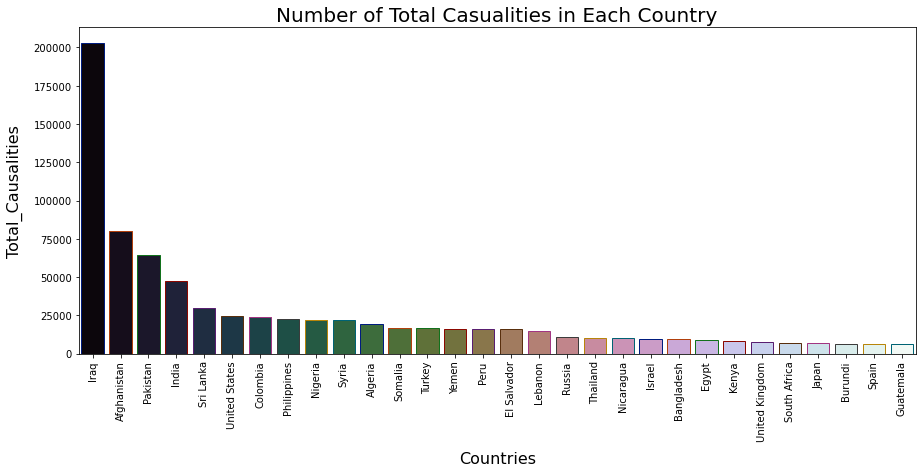

In [97]:
plt.subplots(figsize=(15,6))
sns.barplot(x=count_caus.Country[0:30], y=count_caus.Total_casualities[0:30], palette= 'cubehelix',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number of Total Casualities in Each Country', fontsize  = 20)
plt.xlabel("Countries", fontsize = 16, labelpad = 10)
plt.ylabel("Total_Causalities", fontsize = 16, labelpad = 10)
plt.show()

### Most Affected States by Terrorist Attacks

In [99]:
stat_caus=df.groupby('State')['Total_casualities'].sum().to_frame().reset_index().sort_values('Total_casualities', ascending=False)
stat_caus.head(20)

,State,Total_casualities
211,Baghdad,77170.0
1762,Nineveh,23986.0
2192,Saladin,22814.0
675,Diyala,21432.0
2622,Unknown,21276.0
56,Al Anbar,20389.0
1749,New York,19617.0
2058,Punjab,14559.0
207,Babil,12750.0
1076,Jammu and Kashmir,12268.0


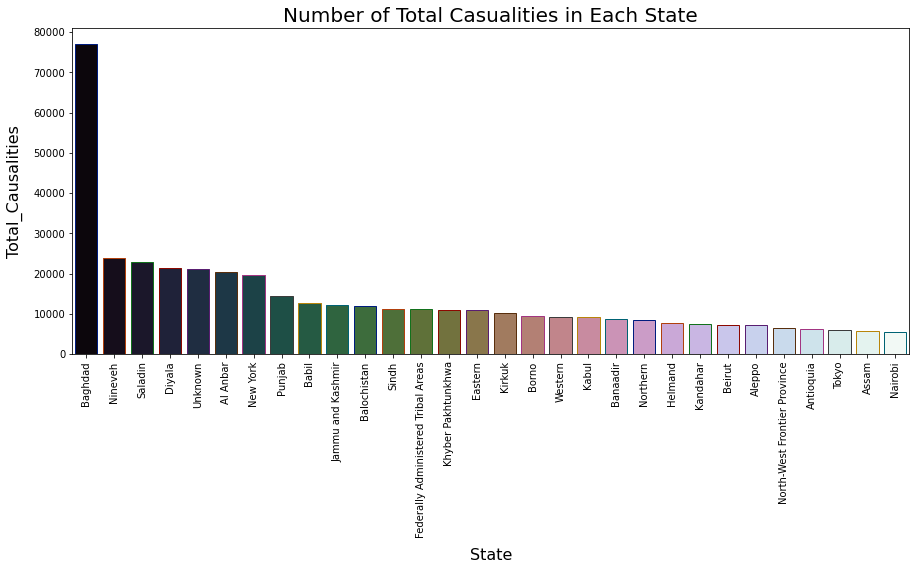

In [103]:
plt.subplots(figsize=(15,6))
sns.barplot(x=stat_caus.State[0:30], y=stat_caus.Total_casualities[0:30], palette= 'cubehelix',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number of Total Casualities in Each State', fontsize  = 20)
plt.xlabel("State", fontsize = 16, labelpad = 10)
plt.ylabel("Total_Causalities", fontsize = 16, labelpad = 10)
plt.show()

### Most Affected Regions by Terrorist Attacks

In [104]:
region_aff = df['Region'].value_counts()
print("Number of Regions affected by the Terrorist Attacks :", len(region_aff))

Number of Regions affected by the Terrorist Attacks : 12


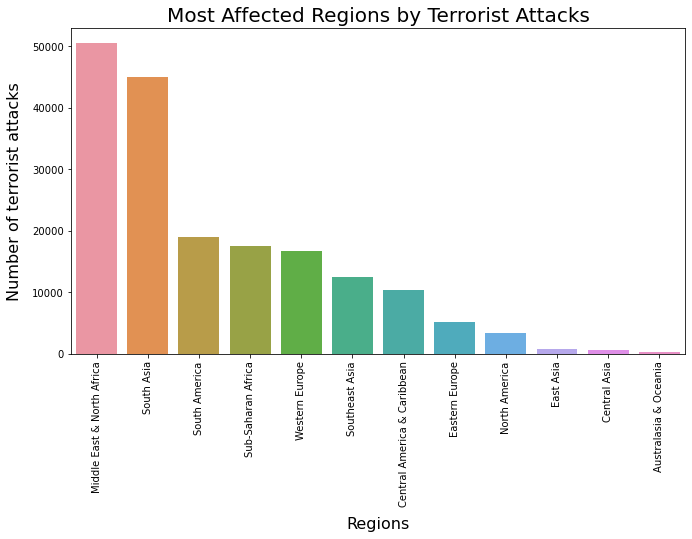

In [105]:
fig = plt.figure(figsize=(11,6))
sns.barplot(region_aff.index, region_aff.values, tick_label = region_aff.index)
plt.title('Most Affected Regions by Terrorist Attacks', fontsize =20)
plt.xlabel('Regions', fontsize = 16, labelpad = 10)
plt.ylabel('Number of terrorist attacks', fontsize = 16, labelpad = 10)
plt.xticks(rotation=90)
plt.show()

### Number of Terrorist Attacks v/s Terrorist Groups

In [106]:
terror_grps = df['Group'].value_counts()
print("Number of Terrorist groups that attacks :", len(terror_grps))

Number of Terrorist groups that attacks : 3537


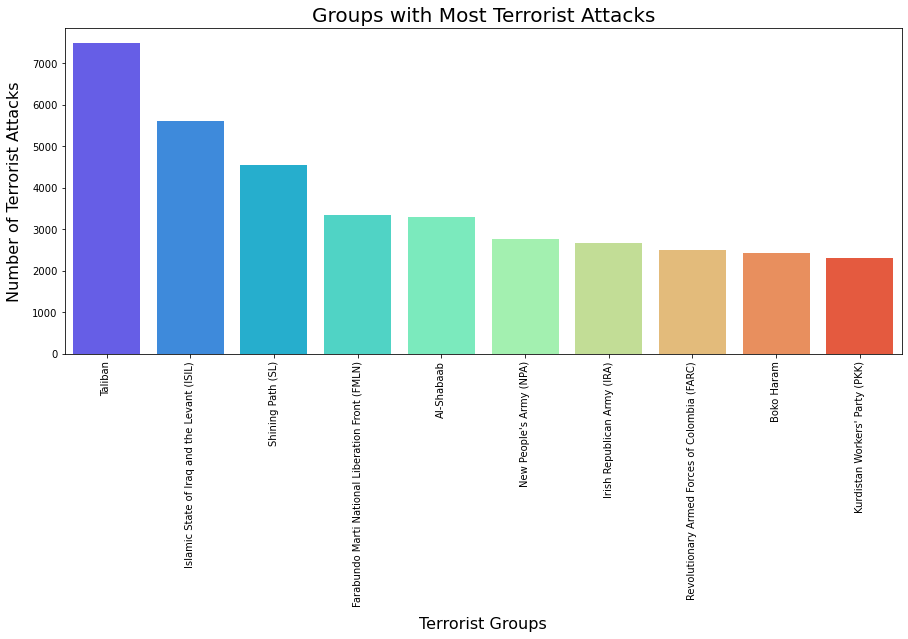

In [107]:
fig = plt.figure(figsize=(15,6))
sns.barplot(terror_grps[1:11].index, terror_grps[1:11].values, palette='rainbow')
plt.title('Groups with Most Terrorist Attacks', fontsize  = 20)
plt.xlabel('Terrorist Groups', fontsize = 16, labelpad = 10)
plt.ylabel('Number of Terrorist Attacks', fontsize = 16, labelpad = 10)
plt.xticks(rotation=90)
plt.show()

### Types of Attacks executed by Terrorists

In [108]:
attack_types = df['AttackType'].value_counts()
print("Number of types of attacks executed by Terrorists :", len(attack_types))

Number of types of attacks executed by Terrorists : 9


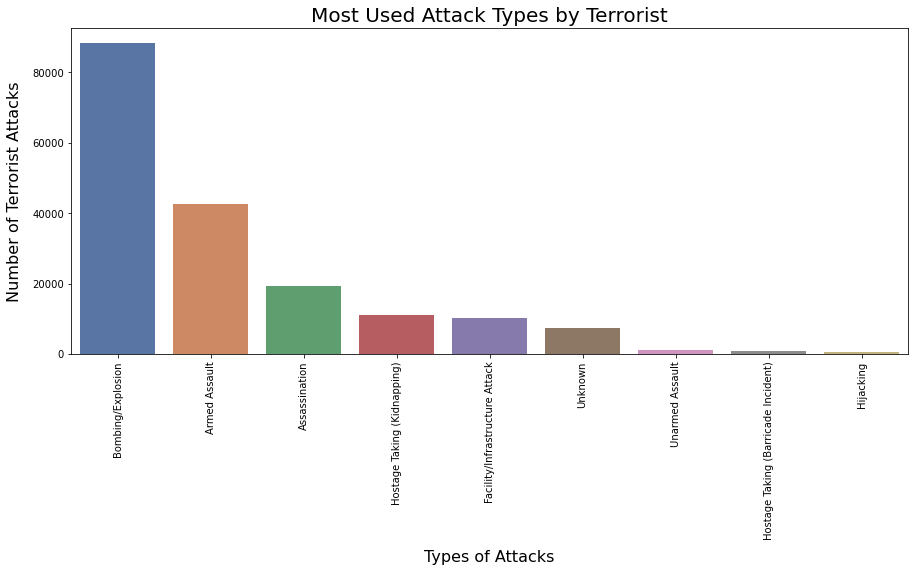

In [109]:
fig = plt.figure(figsize=(15,6))
sns.barplot(attack_types.index, attack_types.values, palette='deep')
plt.xticks(rotation=90)
plt.title("Most Used Attack Types by Terrorist", fontsize  = 20)
plt.xlabel("Types of Attacks", fontsize = 16, labelpad = 10)
plt.ylabel("Number of Terrorist Attacks", fontsize = 16, labelpad = 10)
plt.show()

### Most frequent targets of terrorists

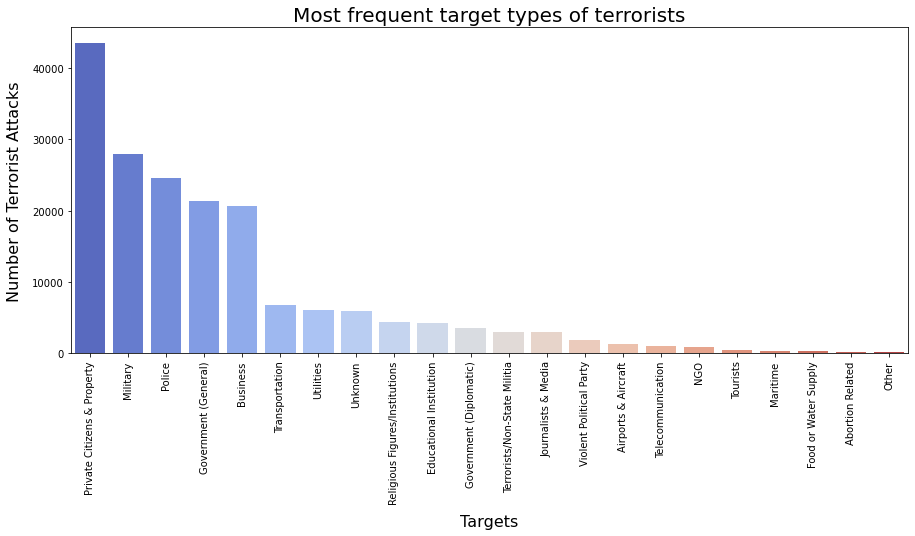

In [110]:
fig = plt.figure(figsize=(15,6))
sns.countplot('Target_type', data=df, order = df['Target_type'].value_counts().index, palette='coolwarm')
plt.xticks(rotation=90)
plt.title("Most frequent target types of terrorists", fontsize =  20)
plt.xlabel("Targets", fontsize = 16, labelpad =  10)
plt.ylabel("Number of Terrorist Attacks", fontsize = 16, labelpad = 10)
plt.show()